## Symplectic Euler Integrator

In [28]:
def classicInt(z,f1,f2,h):
  ## classical symplectic Euler scheme
    dim = int(len(z)/2)
    q=z[:dim]
    p=z[dim:]
    fstage = lambda stg: h * f1(np.block([q + stg, p]))

    stageold=np.zeros(dim) 
    stage = fstage(stageold) +0.
    # Iter = 0

    # while (np.amax(abs(stage - stageold)) > 1e-10 and Iter<400):
    #   stageold = stage+0.
    #   stage = fstage(stage)+0.
    #   Iter = Iter+1
    q = q+stage
    p = p + h*f2(np.block([q,p]))
    return np.block([q,p])

def classicTrajectory(z,f1,f2,h,N=10,n_h=1):
  ## trajectory computed with classicInt
  h_gen = h/n_h
  z = z.reshape(1,-1)[0]
  trj = np.zeros((len(z),N+1))
  trj[:,0] = z.copy()

  for i in range(0,N):
    for j in range(0,int(n_h)):
      trj[:,i+1] = classicInt(trj[:,i].copy(),f1,f2,h_gen)
  return trj[:, :-1], trj[:, 1:]


## Stormer Verlet Integrator

In [29]:
def iterator(fstage,dim,maxiters):
  stageold=np.zeros(dim) 
  stage = fstage(stageold) +0.
  Iter = 0
  while (np.amax(abs(stage - stageold)) > 1e-10 and Iter<maxiters):
    stageold = stage+0.
    stage = fstage(stage)+0.
    Iter = Iter+1
  return stage

def StormerInt(z,f1,f2,h,maxiters):
	## classical symplectic Euler scheme
    dim = int(len(z)/2)
    x=z[:dim]
    y=z[dim:]
    ystage = lambda stg: h/2 * f2(np.block([x, y + stg]))
    stage=iterator(ystage,dim,maxiters)
    y=y+stage

    xstage = lambda stg: h/2 * (f1(np.block([x, y]))+f1(np.block([x+stg, y])))
    stage=iterator(xstage,dim,maxiters)
    x=x+stage
    y=y+h/2*f2(np.block([x, y]))
    return np.block([x,y])

def StormerTrajectory(z,f1,f2,h,N=10,n_h=1,maxiters=100):
	## trajectory computed with classicInt
  h_gen = h/n_h
  z = z.reshape(1,-1)[0]
  trj = np.zeros((len(z),N+1))
  trj[:,0] = z.copy()

  for i in range(0,N):
    for j in range(0,int(n_h)):
      trj[:,i+1] = StormerInt(trj[:,i].copy(),f1,f2,h_gen,maxiters)
  return trj[:, :-1], trj[:, 1:]



## Fourth order symplectic integrator

In [30]:
def fourth_order(z, f1, f2, h, eps=0.1):
    dim = int(len(z)/2)   
    kq = z[:dim]
    kp = z[dim:]
    c = np.array([0.5/(2.-2.**(1./3.)),
         (0.5-2.**(-2./3.))/(2.-2.**(1./3.)),
         (0.5-2.**(-2./3.))/(2.-2.**(1./3.)),
         0.5/(2.-2.**(1./3.))])
    d = np.array([1./(2.-2.**(1./3.)),
         -2.**(1./3.)/(2.-2.**(1./3.)),
         1./(2.-2.**(1./3.)),0.])
    for i_step in range(int(1)):
        for j in range(4):
            tp = kp
            tq = kq + c[j] * f1(z) * h
            kp = tp + d[j] * f2(z) * h
            kq = tq
    return np.block([kq, kp])


def FourthOrder(z,f1,f2,h,N=10,n_h=1,maxiters=100):
	## trajectory computed with classicInt
  h_gen = h/n_h
  z = z.reshape(1,-1)[0]
  trj = np.zeros((len(z),N+1))
  trj[:,0] = z.copy()

  for i in range(0,N):
    for j in range(0,int(n_h)):
      trj[:,i+1] = fourth_order(trj[:,i].copy(),f1,f2,h_gen,maxiters)
  return trj[:, :-1], trj[:, 1:]

The Kepler ODE problem: https://people.sc.fsu.edu/~jburkardt/py_src/kepler_ode/kepler_ode.html

aka the [planar anisotropic kepler problem (secton 3.1)](https://link.springer.com/article/10.1007/s10569-016-9722-z) with $a=1$, $\mu_i=1 \ \ \forall i = 1,2$

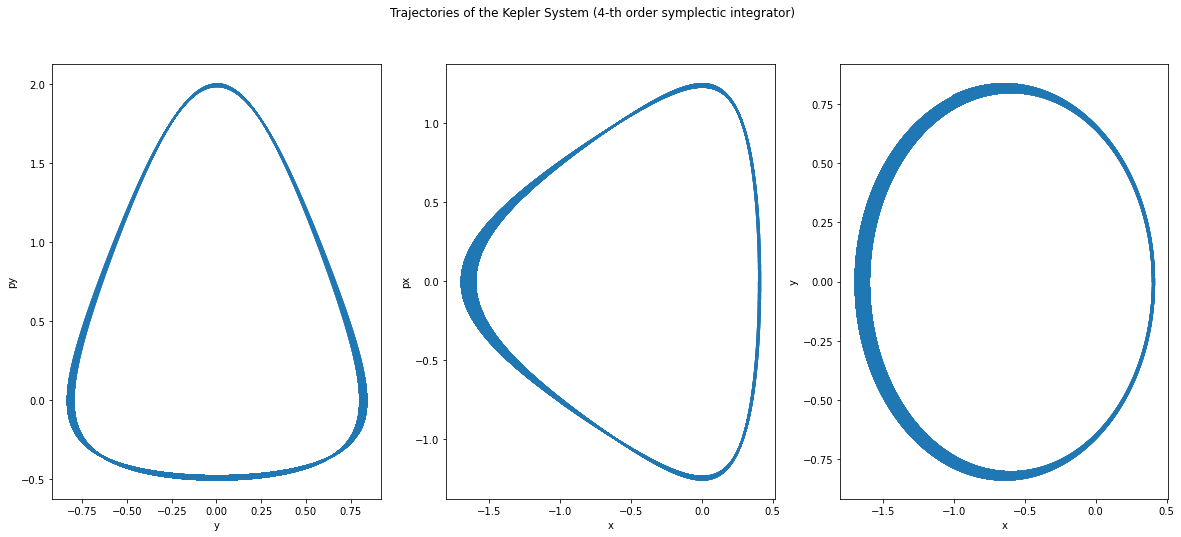

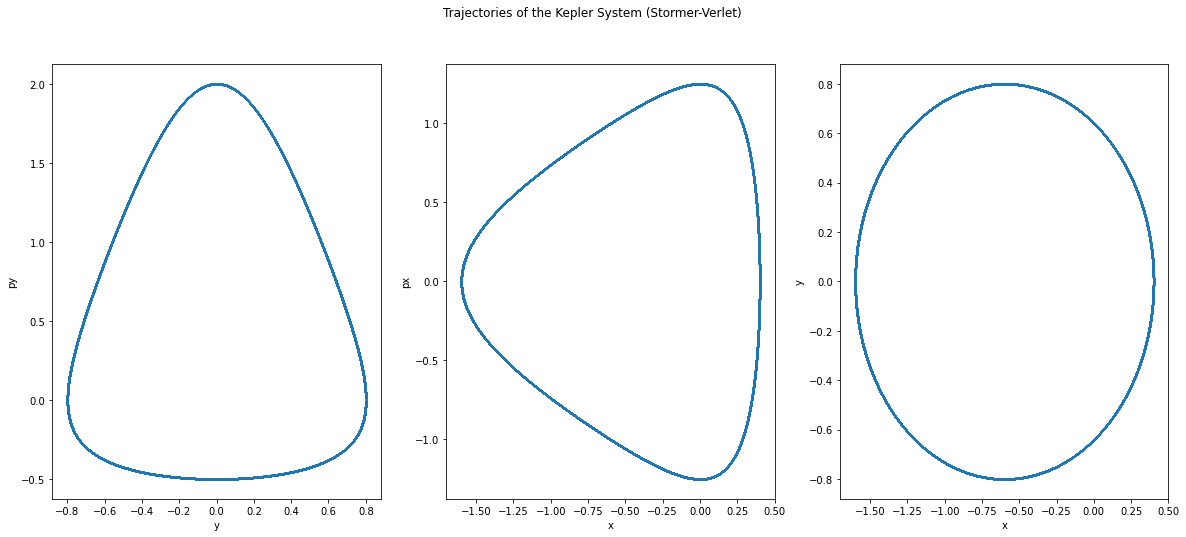

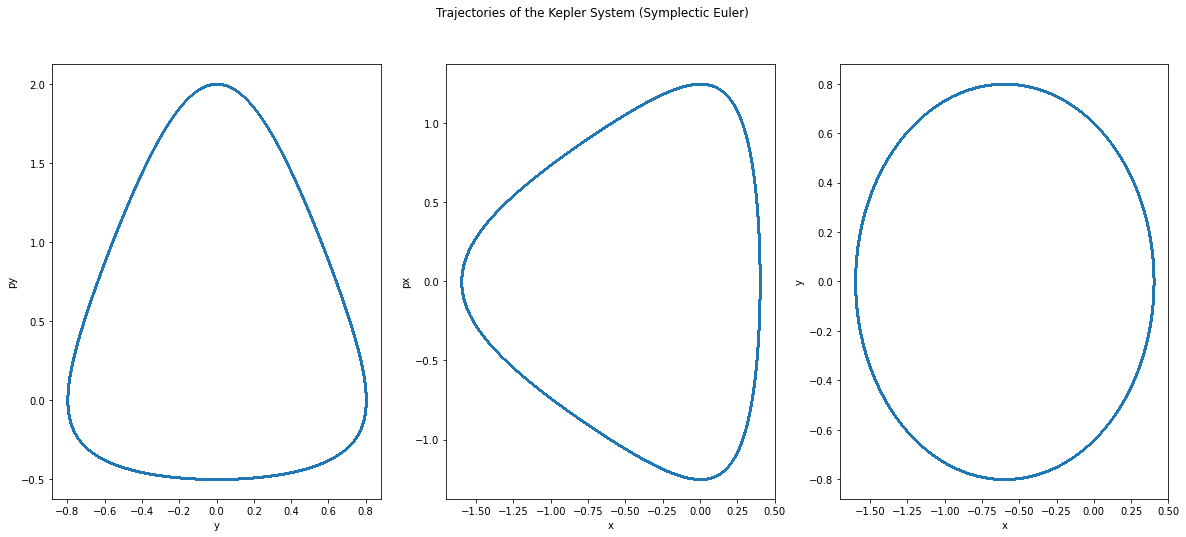

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

f1 = lambda x: np.asarray([x[2], x[3]])
f2 = lambda x: np.asarray([-x[0]*(x[0]**2+x[1]**2)**(-1.5), -x[1]*(x[0]**2+x[1]**2)**(-1.5)])

inp = np.array([1-3/5, 0, 0, np.sqrt((1+3/5)/(1-3/5))])

fig, ax = plt.subplots(1,3,figsize = (20,8))
soln = FourthOrder(inp,f1,f2,0.0001,N=800000,n_h=1)
ax[0].scatter(np.asarray(soln)[0][1,:], np.asarray(soln)[0][3,:], marker = '.', s=0.1)
ax[1].scatter(np.asarray(soln)[0][0,:], np.asarray(soln)[0][2,:], marker = '.', s=0.1)
ax[2].scatter(np.asarray(soln)[0][0,:], np.asarray(soln)[0][1,:], marker = '.', s=0.1)
fig.suptitle("Trajectories of the Kepler System (4-th order symplectic integrator)")
ax[0].set_xlabel("y")
ax[0].set_ylabel("py")
ax[1].set_xlabel("x")
ax[1].set_ylabel("px")
ax[2].set_xlabel("x")
ax[2].set_ylabel("y")
plt.show()

fig, ax = plt.subplots(1,3,figsize = (20,8))
soln = StormerTrajectory(inp,f1,f2,0.0001,N=800000,n_h=1)
ax[0].scatter(np.asarray(soln)[0][1,:], np.asarray(soln)[0][3,:], marker = '.', s=0.1)
ax[1].scatter(np.asarray(soln)[0][0,:], np.asarray(soln)[0][2,:], marker = '.', s=0.1)
ax[2].scatter(np.asarray(soln)[0][0,:], np.asarray(soln)[0][1,:], marker = '.', s=0.1)
fig.suptitle("Trajectories of the Kepler System (Stormer-Verlet)")
ax[0].set_xlabel("y")
ax[0].set_ylabel("py")
ax[1].set_xlabel("x")
ax[1].set_ylabel("px")
ax[2].set_xlabel("x")
ax[2].set_ylabel("y")
plt.show()

fig, ax = plt.subplots(1,3,figsize = (20,8))
soln = classicTrajectory(inp,f1,f2,0.0001,N=800000,n_h=1)
ax[0].scatter(np.asarray(soln)[0][1,:], np.asarray(soln)[0][3,:], marker = '.', s=0.1)
ax[1].scatter(np.asarray(soln)[0][0,:], np.asarray(soln)[0][2,:], marker = '.', s=0.1)
ax[2].scatter(np.asarray(soln)[0][0,:], np.asarray(soln)[0][1,:], marker = '.', s=0.1)
fig.suptitle("Trajectories of the Kepler System (Symplectic Euler)")
ax[0].set_xlabel("y")
ax[0].set_ylabel("py")
ax[1].set_xlabel("x")
ax[1].set_ylabel("px")
ax[2].set_xlabel("x")
ax[2].set_ylabel("y")
plt.show()

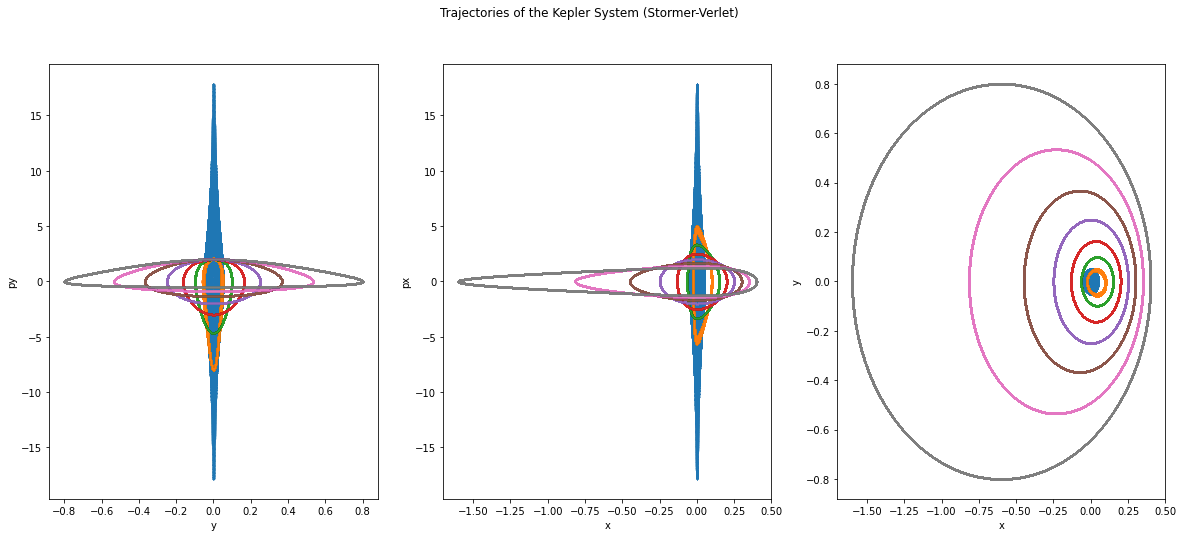

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate


H = lambda x: 0.5 * ( x[2]**2 + x[3]**2 ) - 1.0 / np.sqrt ( x[0]**2 + x[1]**2 )
f1 = lambda x: np.asarray([x[2], x[3]])
f2 = lambda x: np.asarray([-x[0]*(x[0]**2+x[1]**2)**(-1.5), -x[1]*(x[0]**2+x[1]**2)**(-1.5)])

# fig, ax = plt.subplots(1,3,figsize = (20,8))
# for i in np.linspace(-0.1,0.1,8): # number of trajectories
#     inp, lmbda = np.array([1-3/5, 0, 0, np.sqrt((1+3/5)/(1-3/5))]), 1
#     soln = FourthOrder(inp,f1,f2,0.0001,N=80000,n_h=1)
#     ax[0].scatter(np.asarray(soln)[0][1,:], np.asarray(soln)[0][3,:], marker = '.', s=0.1)
#     ax[1].scatter(np.asarray(soln)[0][0,:], np.asarray(soln)[0][2,:], marker = '.', s=0.1)
#     ax[2].scatter(np.asarray(soln)[0][0,:], np.asarray(soln)[0][1,:], marker = '.', s=0.1)
# fig.suptitle("Trajectories of the Kepler System (4-th order symplectic integrator)")
# ax[0].set_xlabel("y")
# ax[0].set_ylabel("py")
# ax[1].set_xlabel("x")
# ax[1].set_ylabel("px")
# ax[2].set_xlabel("x")
# ax[2].set_ylabel("y")
# plt.show()

fig, ax = plt.subplots(1,3,figsize = (20,8))
for i in np.linspace(0.05,0.4,8): # number of trajectories
    inp, lmbda = np.array([i, 0, 0, np.sqrt((1+3/5)/(1-3/5))]), 1
    soln = StormerTrajectory(inp,f1,f2,0.0001,N=800000,n_h=1)
    ax[0].scatter(np.asarray(soln)[0][1,:], np.asarray(soln)[0][3,:], marker = '.', s=0.1)
    ax[1].scatter(np.asarray(soln)[0][0,:], np.asarray(soln)[0][2,:], marker = '.', s=0.1)
    ax[2].scatter(np.asarray(soln)[0][0,:], np.asarray(soln)[0][1,:], marker = '.', s=0.1)
fig.suptitle("Trajectories of the Kepler System (Stormer-Verlet)")
ax[0].set_xlabel("y")
ax[0].set_ylabel("py")
ax[1].set_xlabel("x")
ax[1].set_ylabel("px")
ax[2].set_xlabel("x")
ax[2].set_ylabel("y")
plt.show()

# fig, ax = plt.subplots(1,3,figsize = (20,8))
# for i in np.linspace(-0.1,0.1,8): # number of trajectories
#     inp, lmbda = np.array([0,i,0,0]), 1
#     soln = classicTrajectory(inp,f1,f2,0.0001,N=800000,n_h=1)
#     ax[0].scatter(np.asarray(soln)[0][1,:], np.asarray(soln)[0][3,:], marker = '.', s=0.1)
#     ax[1].scatter(np.asarray(soln)[0][0,:], np.asarray(soln)[0][2,:], marker = '.', s=0.1)
#     ax[2].scatter(np.asarray(soln)[0][0,:], np.asarray(soln)[0][1,:], marker = '.', s=0.1)
# fig.suptitle("Trajectories of the Kepler System (Symplectic Euler)")
# ax[0].set_xlabel("y")
# ax[0].set_ylabel("py")
# ax[1].set_xlabel("x")
# ax[1].set_ylabel("px")
# ax[2].set_xlabel("x")
# ax[2].set_ylabel("y")
# plt.show()

100%|██████████| 12/12 [27:31<00:00, 137.63s/it]


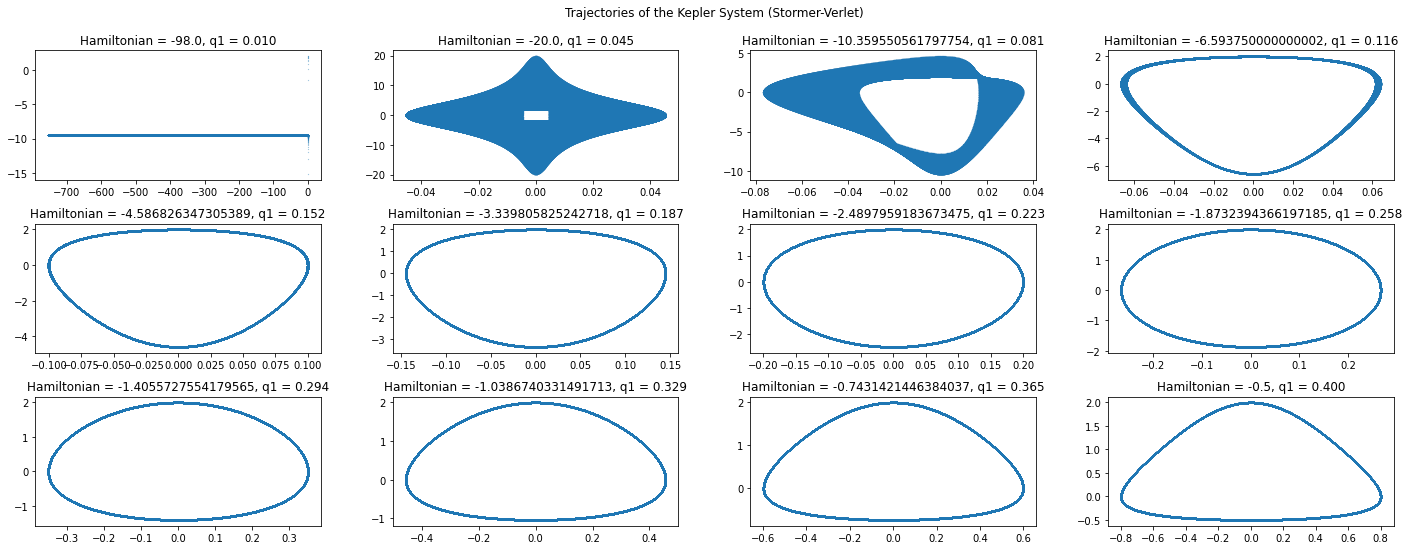

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from tqdm import tqdm

H = lambda x: 0.5 * ( x[2]**2 + x[3]**2 ) - 1.0 / np.sqrt ( x[0]**2 + x[1]**2 )
f1 = lambda x: np.asarray([x[2], x[3]])
f2 = lambda x: np.asarray([-x[0]*(x[0]**2+x[1]**2)**(-1.5), -x[1]*(x[0]**2+x[1]**2)**(-1.5)])


fig, ax = plt.subplots(3,4,figsize = (20,8))
store = np.linspace(0.01,0.4,12)
for i in tqdm(range(len(store))): # number of trajectories
    inp = np.array([store[i], 0, 0, np.sqrt((1+3/5)/(1-3/5))])
    soln = StormerTrajectory(inp,f1,f2,0.0001,N=800000,n_h=1)
    ax[i//4][i%4].scatter(np.asarray(soln)[0][1,:], np.asarray(soln)[0][3,:], marker = '.', s=0.1)
    ax[i//4][i%4].title.set_text("Hamiltonian = %s, q1 = %.3f" %(H(inp), store[i]))
    # ax[1].scatter(np.asarray(soln)[0][0,:], np.asarray(soln)[0][2,:], marker = '.', s=0.1)
    # ax[2].scatter(np.asarray(soln)[0][0,:], np.asarray(soln)[0][1,:], marker = '.', s=0.1)
fig.suptitle("Trajectories of the Kepler System (Stormer-Verlet)")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

^ From the above plots, it appears that q1 cannot be too small.

100%|██████████| 12/12 [27:38<00:00, 138.17s/it]


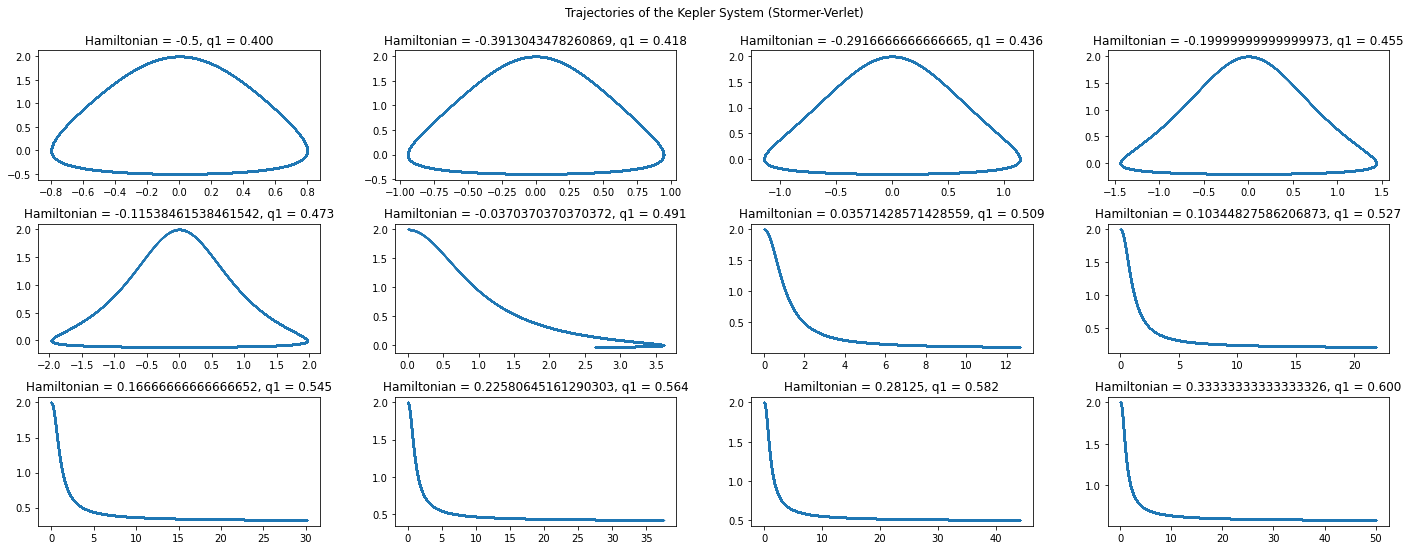

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from tqdm import tqdm

H = lambda x: 0.5 * ( x[2]**2 + x[3]**2 ) - 1.0 / np.sqrt ( x[0]**2 + x[1]**2 )
f1 = lambda x: np.asarray([x[2], x[3]])
f2 = lambda x: np.asarray([-x[0]*(x[0]**2+x[1]**2)**(-1.5), -x[1]*(x[0]**2+x[1]**2)**(-1.5)])


fig, ax = plt.subplots(3,4,figsize = (20,8))
store = np.linspace(0.4,0.6,12)
for i in tqdm(range(len(store))): # number of trajectories
    inp = np.array([store[i], 0, 0, np.sqrt((1+3/5)/(1-3/5))])
    soln = StormerTrajectory(inp,f1,f2,0.0001,N=800000,n_h=1)
    ax[i//4][i%4].scatter(np.asarray(soln)[0][1,:], np.asarray(soln)[0][3,:], marker = '.', s=0.1)
    ax[i//4][i%4].title.set_text("Hamiltonian = %s, q1 = %.3f" %(H(inp), store[i]))
    # ax[1].scatter(np.asarray(soln)[0][0,:], np.asarray(soln)[0][2,:], marker = '.', s=0.1)
    # ax[2].scatter(np.asarray(soln)[0][0,:], np.asarray(soln)[0][1,:], marker = '.', s=0.1)
fig.suptitle("Trajectories of the Kepler System (Stormer-Verlet)")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

^ From the above plots it appears as if the Hamiltonian has to be negative, otherwise it exhibits escape dynamics (which makes sense, the negative/ potential energy is the attraction between the two bodies. if KE>PE, the bodies can escape)

F0r the next plot we take the initial conditions from [1](https://demonstrations.wolfram.com/PhaseSpaceOrbitsForTheKeplerProblemOnConstantEnergySurfaces/)

  0%|          | 0/4 [00:00<?, ?it/s]

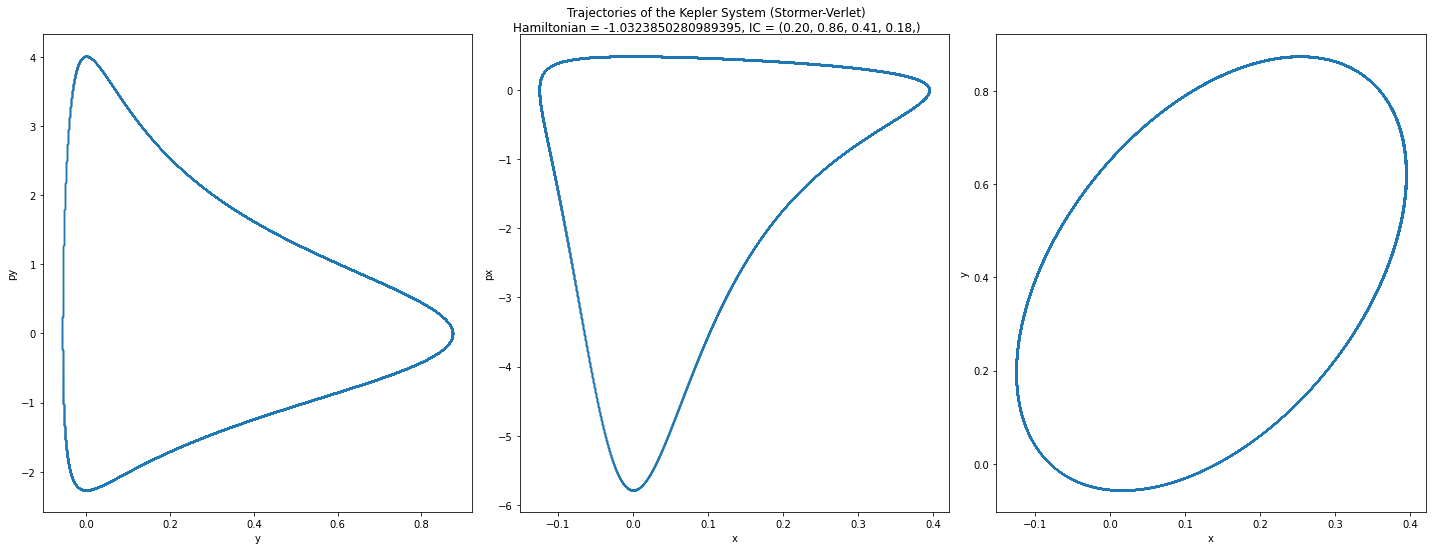

 25%|██▌       | 1/4 [02:26<07:18, 146.14s/it]

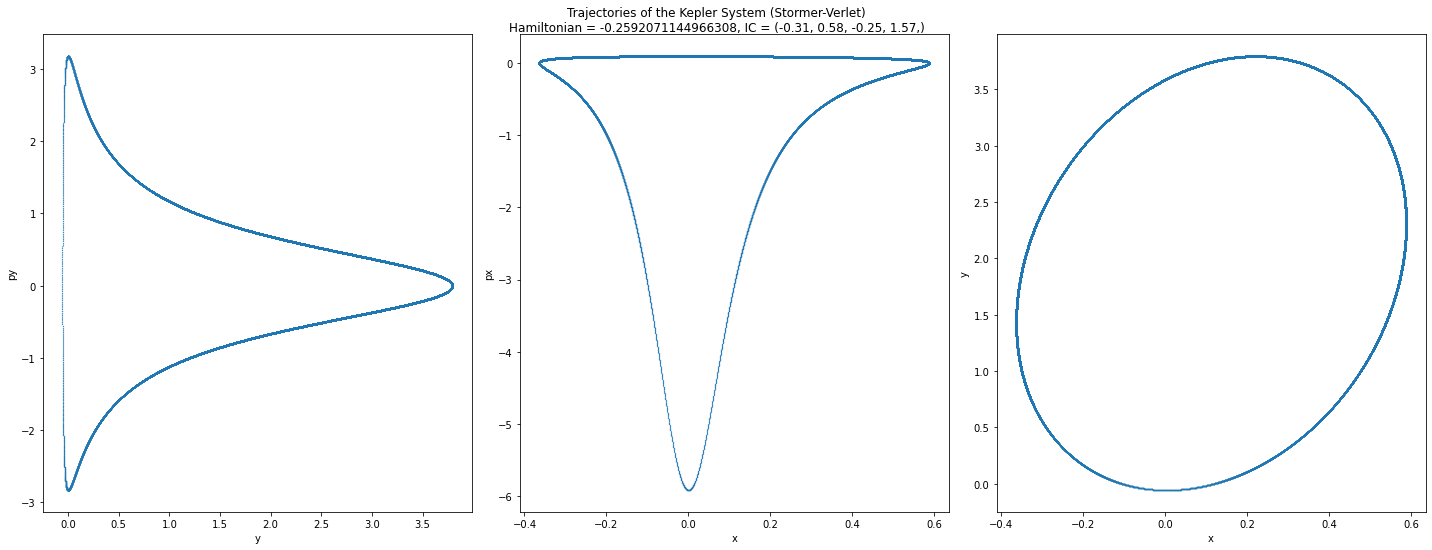

 50%|█████     | 2/4 [04:46<04:45, 142.82s/it]

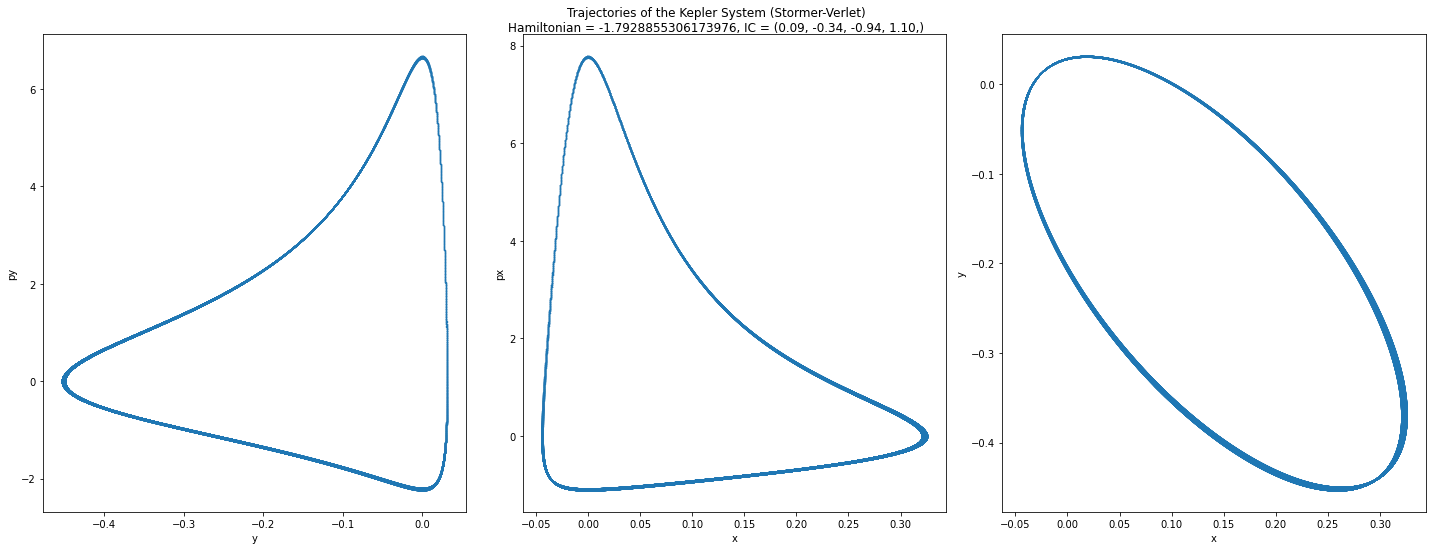

 75%|███████▌  | 3/4 [07:07<02:21, 141.86s/it]

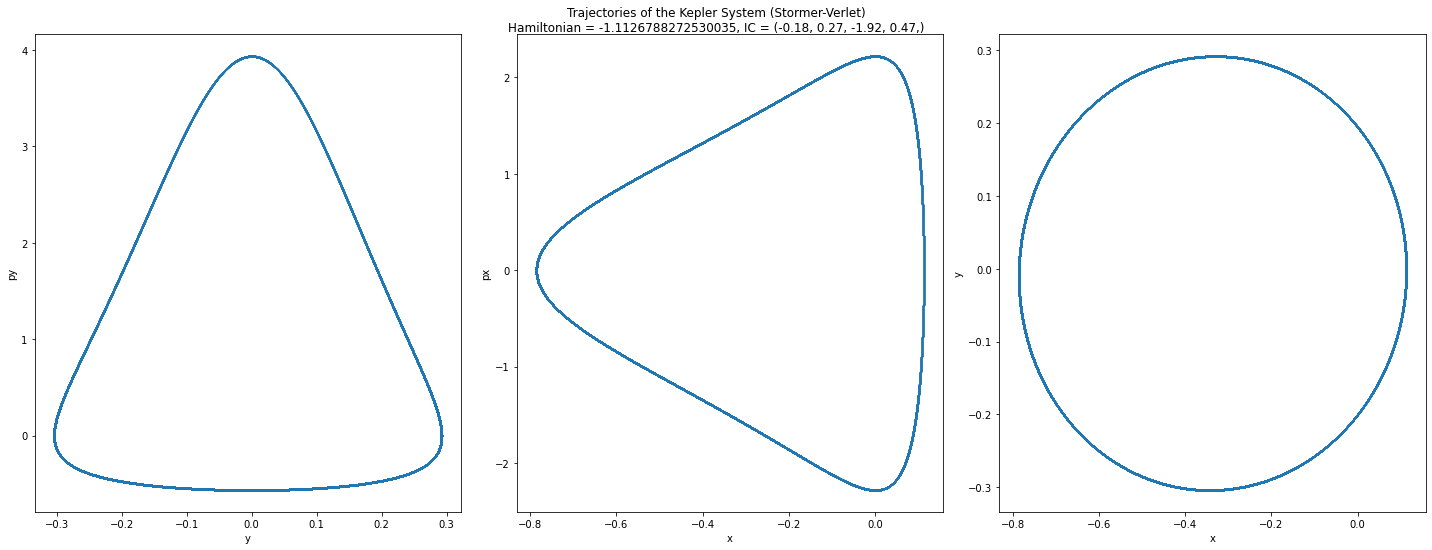

100%|██████████| 4/4 [09:26<00:00, 141.52s/it]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from tqdm import tqdm

H = lambda x: 0.5 * ( x[2]**2 + x[3]**2 ) - 1.0 / np.sqrt ( x[0]**2 + x[1]**2 )
f1 = lambda x: np.asarray([x[2], x[3]])
f2 = lambda x: np.asarray([-x[0]*(x[0]**2+x[1]**2)**(-1.5), -x[1]*(x[0]**2+x[1]**2)**(-1.5)])
spacedim = [(-2.,2.), (-2.,2.), (-2.,2.), (-2.,2.),]

np.random.seed(0)
for i in tqdm(range(4)): # number of trajectories
    fig, ax = plt.subplots(1,3,figsize = (20,8))
    inp = np.random.rand(4)*4-2.
    while H(inp)>0:
      inp = np.random.rand(4)*4-2. # removing the cases where H>0 (escape)
    soln = StormerTrajectory(inp,f1,f2,0.0001,N=800000,n_h=1)
    ax[0].scatter(np.asarray(soln)[0][1,:], np.asarray(soln)[0][3,:], marker = '.', s=0.1)
    ax[1].scatter(np.asarray(soln)[0][0,:], np.asarray(soln)[0][2,:], marker = '.', s=0.1)
    ax[2].scatter(np.asarray(soln)[0][0,:], np.asarray(soln)[0][1,:], marker = '.', s=0.1)
    fig.suptitle("Trajectories of the Kepler System (Stormer-Verlet)\nHamiltonian = %s, IC = (%.2f, %.2f, %.2f, %.2f,)" %(H(inp), inp[0], inp[1], inp[2], inp[3]))
    ax[0].set_xlabel("y")
    ax[0].set_ylabel("py")
    ax[1].set_xlabel("x")
    ax[1].set_ylabel("px")
    ax[2].set_xlabel("x")
    ax[2].set_ylabel("y")
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from tqdm import tqdm

H = lambda x: 0.5 * ( x[2]**2 + x[3]**2 ) - 1.0 / np.sqrt ( x[0]**2 + x[1]**2 )
f1 = lambda x: np.asarray([x[2], x[3]])
f2 = lambda x: np.asarray([-x[0]*(x[0]**2+x[1]**2)**(-1.5), -x[1]*(x[0]**2+x[1]**2)**(-1.5)])
spacedim = [(-2.,2.), (-2.,2.), (-2.,2.), (-2.,2.),]

np.random.seed(0)
for i in tqdm(range(50)): # number of trajectories
    fig, ax = plt.subplots(1,3,figsize = (20,8))
    inp = np.random.rand(4)*4-2.
    while H(inp)>0:
      inp = np.random.rand(4)*4-2. # removing the cases where H>0 (escape)
    soln = StormerTrajectory(inp,f1,f2,0.001,N=80000,n_h=1)
    ax[0].scatter(np.asarray(soln)[0][1,:], np.asarray(soln)[0][3,:], marker = '.', s=0.1)
    ax[1].scatter(np.asarray(soln)[0][0,:], np.asarray(soln)[0][2,:], marker = '.', s=0.1)
    ax[2].scatter(np.asarray(soln)[0][0,:], np.asarray(soln)[0][1,:], marker = '.', s=0.1)
    fig.suptitle("Trajectories of the Kepler System (Stormer-Verlet)\nHamiltonian = %s, IC = (%.2f, %.2f, %.2f, %.2f,)" %(H(inp), inp[0], inp[1], inp[2], inp[3]))
    ax[0].set_xlabel("y")
    ax[0].set_ylabel("py")
    ax[1].set_xlabel("x")
    ax[1].set_ylabel("px")
    ax[2].set_xlabel("x")
    ax[2].set_ylabel("y")
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from tqdm import tqdm

H = lambda x: 0.5 * ( x[2]**2 + x[3]**2 ) - 1.0 / np.sqrt ( x[0]**2 + x[1]**2 )
f1 = lambda x: np.asarray([x[2], x[3]])
f2 = lambda x: np.asarray([-x[0]*(x[0]**2+x[1]**2)**(-1.5), -x[1]*(x[0]**2+x[1]**2)**(-1.5)])
spacedim = [(-1.,1.), (-1.,1.), (-1.,1.), (-1.,1.),]

np.random.seed(0)
for i in tqdm(range(50)): # number of trajectories
    fig, ax = plt.subplots(1,3,figsize = (20,8))
    inp = np.random.rand(4)*2-1.
    while H(inp)>0:
      inp = np.random.rand(4)*2-1. # removing the cases where H>0 (escape)
    soln = StormerTrajectory(inp,f1,f2,0.001,N=80000,n_h=1)
    ax[0].scatter(np.asarray(soln)[0][1,:], np.asarray(soln)[0][3,:], marker = '.', s=0.1)
    ax[1].scatter(np.asarray(soln)[0][0,:], np.asarray(soln)[0][2,:], marker = '.', s=0.1)
    ax[2].scatter(np.asarray(soln)[0][0,:], np.asarray(soln)[0][1,:], marker = '.', s=0.1)
    fig.suptitle("Trajectories of the Kepler System (Stormer-Verlet)\nHamiltonian = %s, IC = (%.2f, %.2f, %.2f, %.2f,)" %(H(inp), inp[0], inp[1], inp[2], inp[3]))
    ax[0].set_xlabel("y")
    ax[0].set_ylabel("py")
    ax[1].set_xlabel("x")
    ax[1].set_ylabel("px")
    ax[2].set_xlabel("x")
    ax[2].set_ylabel("y")
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from tqdm import tqdm

H = lambda x: 0.5 * ( x[2]**2 + x[3]**2 ) - 1.0 / np.sqrt ( x[0]**2 + x[1]**2 )
f1 = lambda x: np.asarray([x[2], x[3]])
f2 = lambda x: np.asarray([-x[0]*(x[0]**2+x[1]**2)**(-1.5), -x[1]*(x[0]**2+x[1]**2)**(-1.5)])
spacedim = [(-3,3), (-3,3), (-3,3), (-3,3),]

np.random.seed(0)
for i in tqdm(range(50)): # number of trajectories
    fig, ax = plt.subplots(1,3,figsize = (20,8))
    inp = -np.random.rand(4)*6-3
    while H(inp)>0:
      inp = np.random.rand(4)*6-3. # removing the cases where H>0 (escape)
    soln = StormerTrajectory(inp,f1,f2,0.001,N=80000,n_h=1)
    ax[0].scatter(np.asarray(soln)[0][1,:], np.asarray(soln)[0][3,:], marker = '.', s=0.1)
    ax[1].scatter(np.asarray(soln)[0][0,:], np.asarray(soln)[0][2,:], marker = '.', s=0.1)
    ax[2].scatter(np.asarray(soln)[0][0,:], np.asarray(soln)[0][1,:], marker = '.', s=0.1)
    fig.suptitle("Trajectories of the Kepler System (Stormer-Verlet)\nHamiltonian = %s, IC = (%.2f, %.2f, %.2f, %.2f,)" %(H(inp), inp[0], inp[1], inp[2], inp[3]))
    ax[0].set_xlabel("y")
    ax[0].set_ylabel("py")
    ax[1].set_xlabel("x")
    ax[1].set_ylabel("px")
    ax[2].set_xlabel("x")
    ax[2].set_ylabel("y")
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from tqdm import tqdm

H = lambda x: 0.5 * ( x[2]**2 + x[3]**2 ) - 1.0 / np.sqrt ( x[0]**2 + x[1]**2 )
f1 = lambda x: np.asarray([x[2], x[3]])
f2 = lambda x: np.asarray([-x[0]*(x[0]**2+x[1]**2)**(-1.5), -x[1]*(x[0]**2+x[1]**2)**(-1.5)])

np.random.seed(0)
for i in tqdm(range(50)): # number of trajectories
    fig, ax = plt.subplots(1,3,figsize = (20,8))
    inp = -np.random.rand(4)*8-4
    while H(inp)>0:
      inp = np.random.rand(4)*8-4. # removing the cases where H>0 (escape)
    soln = StormerTrajectory(inp,f1,f2,0.001,N=80000,n_h=1)
    ax[0].scatter(np.asarray(soln)[0][1,:], np.asarray(soln)[0][3,:], marker = '.', s=0.1)
    ax[1].scatter(np.asarray(soln)[0][0,:], np.asarray(soln)[0][2,:], marker = '.', s=0.1)
    ax[2].scatter(np.asarray(soln)[0][0,:], np.asarray(soln)[0][1,:], marker = '.', s=0.1)
    fig.suptitle("Trajectories of the Kepler System (Stormer-Verlet)\nHamiltonian = %s, IC = (%.2f, %.2f, %.2f, %.2f,)" %(H(inp), inp[0], inp[1], inp[2], inp[3]))
    ax[0].set_xlabel("y")
    ax[0].set_ylabel("py")
    ax[1].set_xlabel("x")
    ax[1].set_ylabel("px")
    ax[2].set_xlabel("x")
    ax[2].set_ylabel("y")
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from tqdm import tqdm

H = lambda x: 0.5 * ( x[2]**2 + x[3]**2 ) - 1.0 / np.sqrt ( x[0]**2 + x[1]**2 )
f1 = lambda x: np.asarray([x[2], x[3]])
f2 = lambda x: np.asarray([-x[0]*(x[0]**2+x[1]**2)**(-1.5), -x[1]*(x[0]**2+x[1]**2)**(-1.5)])

np.random.seed(0)
for i in tqdm(range(50)): # number of trajectories
    fig, ax = plt.subplots(1,3,figsize = (20,8))
    inp = np.random.rand(4)*2-1
    while H(inp)>0 and np.abs(inp[0])<0.1 and np.abs(inp[1])<0.1:
      inp = np.random.rand(4)*2-1. # removing the cases where H>0 (escape)
    soln = StormerTrajectory(inp,f1,f2,0.001,N=80000,n_h=1)
    ax[0].scatter(np.asarray(soln)[0][1,:], np.asarray(soln)[0][3,:], marker = '.', s=0.1)
    ax[1].scatter(np.asarray(soln)[0][0,:], np.asarray(soln)[0][2,:], marker = '.', s=0.1)
    ax[2].scatter(np.asarray(soln)[0][0,:], np.asarray(soln)[0][1,:], marker = '.', s=0.1)
    fig.suptitle("Trajectories of the Kepler System (Stormer-Verlet)\nHamiltonian = %s, IC = (%.2f, %.2f, %.2f, %.2f,)" %(H(inp), inp[0], inp[1], inp[2], inp[3]))
    ax[0].set_xlabel("y")
    ax[0].set_ylabel("py")
    ax[1].set_xlabel("x")
    ax[1].set_ylabel("px")
    ax[2].set_xlabel("x")
    ax[2].set_ylabel("y")
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

Output hidden; open in https://colab.research.google.com to view.